# Gradient Descent (GD)

#### General Idea
Gradient Descent is an optimization algorithm used to find the values of the parameters of a function f, such that a cost function is minimized. 

#### Intuition
Image a bowl is the cost function we are trying to minimize. By starting at some random position on the bowl we would like to walk the path with the steepest slope towards the minimium (bottom center of the bowl). This minimum represents the optimal parameter values for f such that the cost function is minimized. 

#### Learning Rate
When we perform Gradient Descent, we pick a direction to move in as well as a magnitude. This magnitude can be imagined to be the size of the step we take. This step size is a hyperparameter known as the Learning Rate, and can be tuned to the specific modeling scenario. 

#### Batch Gradient Descent (BGD) VS. Stochastic Gradient Descent (SGD)

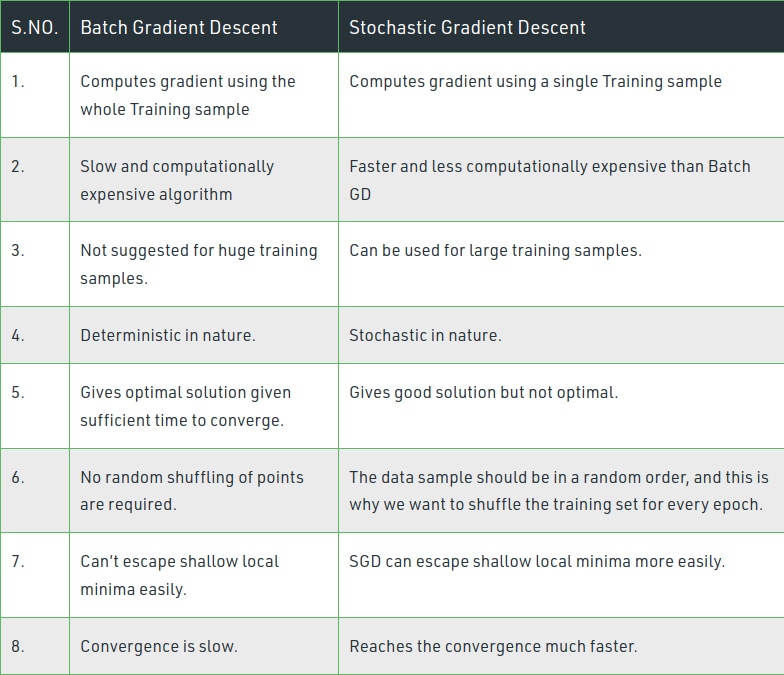





# Matplotlib 3D Testing

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
%matplotlib notebook

### 3D Function Plotting

<IPython.core.display.Javascript object>


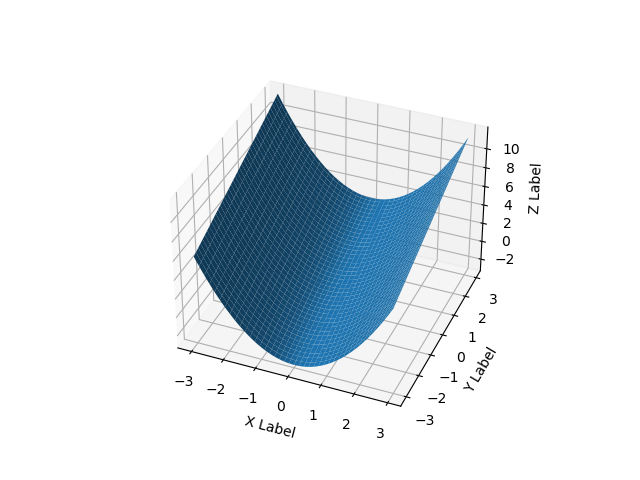

In [2]:
def fun(x, y):
    return x**2 + y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### 3D Animation

<IPython.core.display.Javascript object>


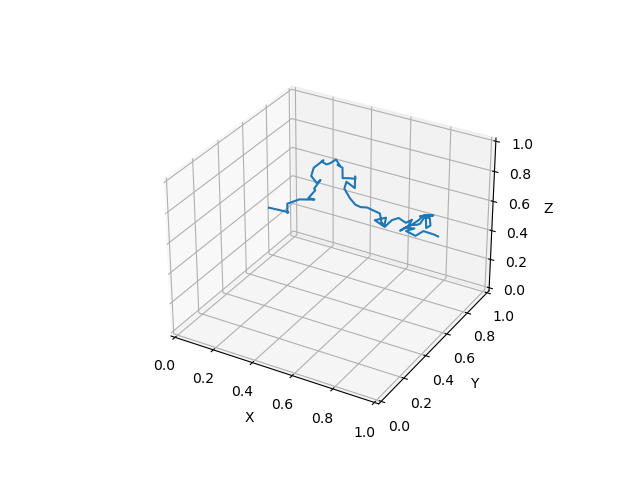

In [10]:
def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 100
walks = [random_walk(num_steps) for index in range(1)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.show()